
# bar(x, height)

See `~matplotlib.axes.Axes.bar`.


In [47]:
import pandas as pd


###############################
# bar图的数据 原数据为cycle数
###############################

# Need to configure by hands
file_name="hwacha_speed.csv"
map_params=["M","K","N"]
base_line="CPU" # 剩下的为player
# plareys_params=["Hwacha","PolymorPIC"]


players_list_bar=[]
players_list=[]
maps_list=[]
players_cycle_scores_bar={}
players_speed_up_scores_bar={}
players_tops_area_scores_line={}
polymorpic_speedup_line=[]
players_gops={}

#### load Data >>>>>>>>>
dataframe = pd.read_csv(file_name)
dataframe.set_index(map_params, inplace=True)
print(dataframe)


base_line_scores= dataframe[base_line].tolist()
for e in dataframe.columns:
    if e==base_line:
        continue
    players_list_bar.append(e)
players_list=players_list_bar
    
for player in players_list_bar:
    players_cycle_scores_bar[player]=[]
    players_speed_up_scores_bar[player]=[]
    players_tops_area_scores_line[player]=[]
    players_gops[player]=[]
    

# original data:cycle
for index,row in dataframe.iterrows():
    # matrix_size=str(index[0])+"$\\times$"+str(index[1])+"$\\times$"+str(index[2])
    matrix_size=str(index[0])+"$\\times$"+str(index[1])
    maps_list.append(matrix_size)
    for player_name in players_list_bar:
        players_cycle_scores_bar[player_name].append(int(row[player_name]))

print(players_cycle_scores_bar)
# speed up
for player in players_list_bar:
    cpu_cycle_list=base_line_scores
    player_cycle_list=players_cycle_scores_bar[player]
    for score1, score2 in zip(cpu_cycle_list, player_cycle_list):
        players_speed_up_scores_bar[player].append(score1/score2)
    
# sped up line 
hwacha_score=player_cycle_list=players_cycle_scores_bar["Hwacha"]
pic_score=player_cycle_list=players_cycle_scores_bar["PolymorPIC"]
for score1, score2 in zip(hwacha_score, pic_score):
    polymorpic_speedup_line.append(score1/score2)

print(polymorpic_speedup_line)

                         CPU      Hwacha  PolymorPIC
M    K    N                                         
256  256  256   4.702087e+08     2134718     1568052
     512  512   1.889548e+09     8467501     5174847
512  512  512   3.778953e+09    16925335     8551293
256  1024 1024  1.525423e+10    33711169    12254608
1024 1024 1024  6.101627e+10   134808264    49402664
1536 1536 1536  1.850000e+11   454312645   143499878
     2048 2048  4.200000e+11   807175483   237716318
2048 2048 2048  4.850000e+11  1076101829   320139481
512  4096 4096  6.160000e+11  1074988202   282658203
2048 4096 4096  2.460000e+12  4299949266  1130579623
4096 4096 4096  5.000000e+12  8599897256  2239533772
{'Hwacha': [2134718, 8467501, 16925335, 33711169, 134808264, 454312645, 807175483, 1076101829, 1074988202, 4299949266, 8599897256], 'PolymorPIC': [1568052, 5174847, 8551293, 12254608, 49402664, 143499878, 237716318, 320139481, 282658203, 1130579623, 2239533772]}
[1.3613821480410089, 1.63628045428203, 1.9792720

In [48]:
###############################
# line图的数据
###############################

# Need to configure by hands
hwacha_area=0.97584732
polymorpic_area=0.37584732
frequency=1000000000
area_dict={"Hwacha":hwacha_area,"PolymorPIC":polymorpic_area}

for index,row in dataframe.iterrows():
    M=index[0]
    N=index[1]
    K=index[2]
    total_operations=M*K*(2*N-1)
    one_T=1000000000000
    total_operations_one_T=total_operations/one_T
    

    for player_name in players_list_bar:
        cycle_time=row[player_name]
        exe_time_ms=1000*cycle_time/frequency
        players_tops_area_scores_line[player_name].append(total_operations_one_T/exe_time_ms/area_dict[player_name]/1000)
        players_gops[player_name].append(total_operations_one_T/exe_time_ms/1000)
#### <<<<<<<< load Data 

import scipy.stats



[[0.2784313725490196, 0.28627450980392155, 0.3803921568627451], [0.12941176470588237, 0.10196078431372549, 0.24313725490196078], [0.6470588235294118, 0.592156862745098, 0.7137254901960784], [0.996078431372549, 0.9529411764705882, 0.9098039215686274], [0.8156862745098039, 0.4235294117647059, 0.615686274509804], [0.06666666666666667, 0.07058823529411765, 0.06274509803921569], [0.3607843137254902, 0.34509803921568627, 0.3333333333333333], [1.0, 1.0, 1.0], [0.8313725490196079, 0.8313725490196079, 0.8313725490196079]]
['1', '2', '3', '4', '5', '6', '7', '8', '9']


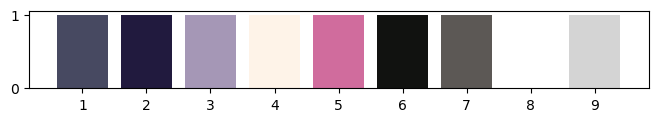

Please choose color for the following players:
['Hwacha', 'PolymorPIC']


In [49]:
# Show color options
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# (33,26,62),(69,51,112),(165,151,182),(254,243,232),(208,108,157)
colors_option = {"1":[71, 73, 97], 
                 "2":[33,26,62], 
                 "3":[165,151,182], 
                 "4":[254,243,232], 
                 "5":[208,108,157],
                 "6":[17,18,16],
                 "7":[92,88,85],
                 "8":[255,255,255],
                 "9":[212,212,212]}
# normalize
colors_list=[]
colors_id=[]
for key in colors_option:
    color_RGB=colors_option[key]
    for i in range(len(color_RGB)):
        color_RGB[i]/=255
    colors_list.append(color_RGB)
    colors_option[key]=color_RGB
    colors_id.append(key)
    
print(colors_list)
print(colors_id)

fig, ax = plt.subplots(figsize=(8, 1))
data = [1 for i in range(len(colors_option))]
ax.bar(range(len(data)), data, color=colors_list, tick_label=colors_id)
plt.show()

print("Please choose color for the following players:")
print(players_list)

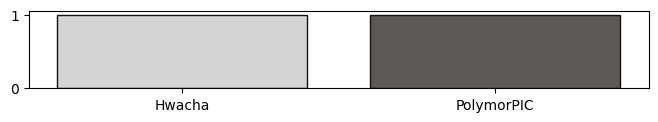

In [50]:
# choose color
# 根据从左到右的顺序设置颜色
choosed_colors_id=[9,7]
choosed_colors=[colors_option[str(i)] for i in choosed_colors_id]
edgecolor_id=[6,6]
choosed_edgecolor=[colors_option[str(i)] for i in edgecolor_id]
rotation_=[60,50]

fig, ax = plt.subplots(figsize=(8, 1))
data = [1 for i in range(len(players_list_bar))]
ax.bar(range(len(data)), data, color=choosed_colors, edgecolor=choosed_edgecolor, tick_label=players_list_bar)
plt.show()

# Generate choose dict
choosed_colors_dict = {player: color for player, color in zip(players_list_bar, choosed_colors)}
choosed_edgecolor_dict = {player: color for player, color in zip(players_list_bar, choosed_edgecolor)}
# choosed_rotation_dict = {player: color for player, color in zip(players_list_bar, rotation_)}


11


/var/folders/mn/d07bd1893b7bp19drk69nlk00000gn/T/ipykernel_66416/4291790716.py:61: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax_bar.set_ylim([0, y_max+3000])


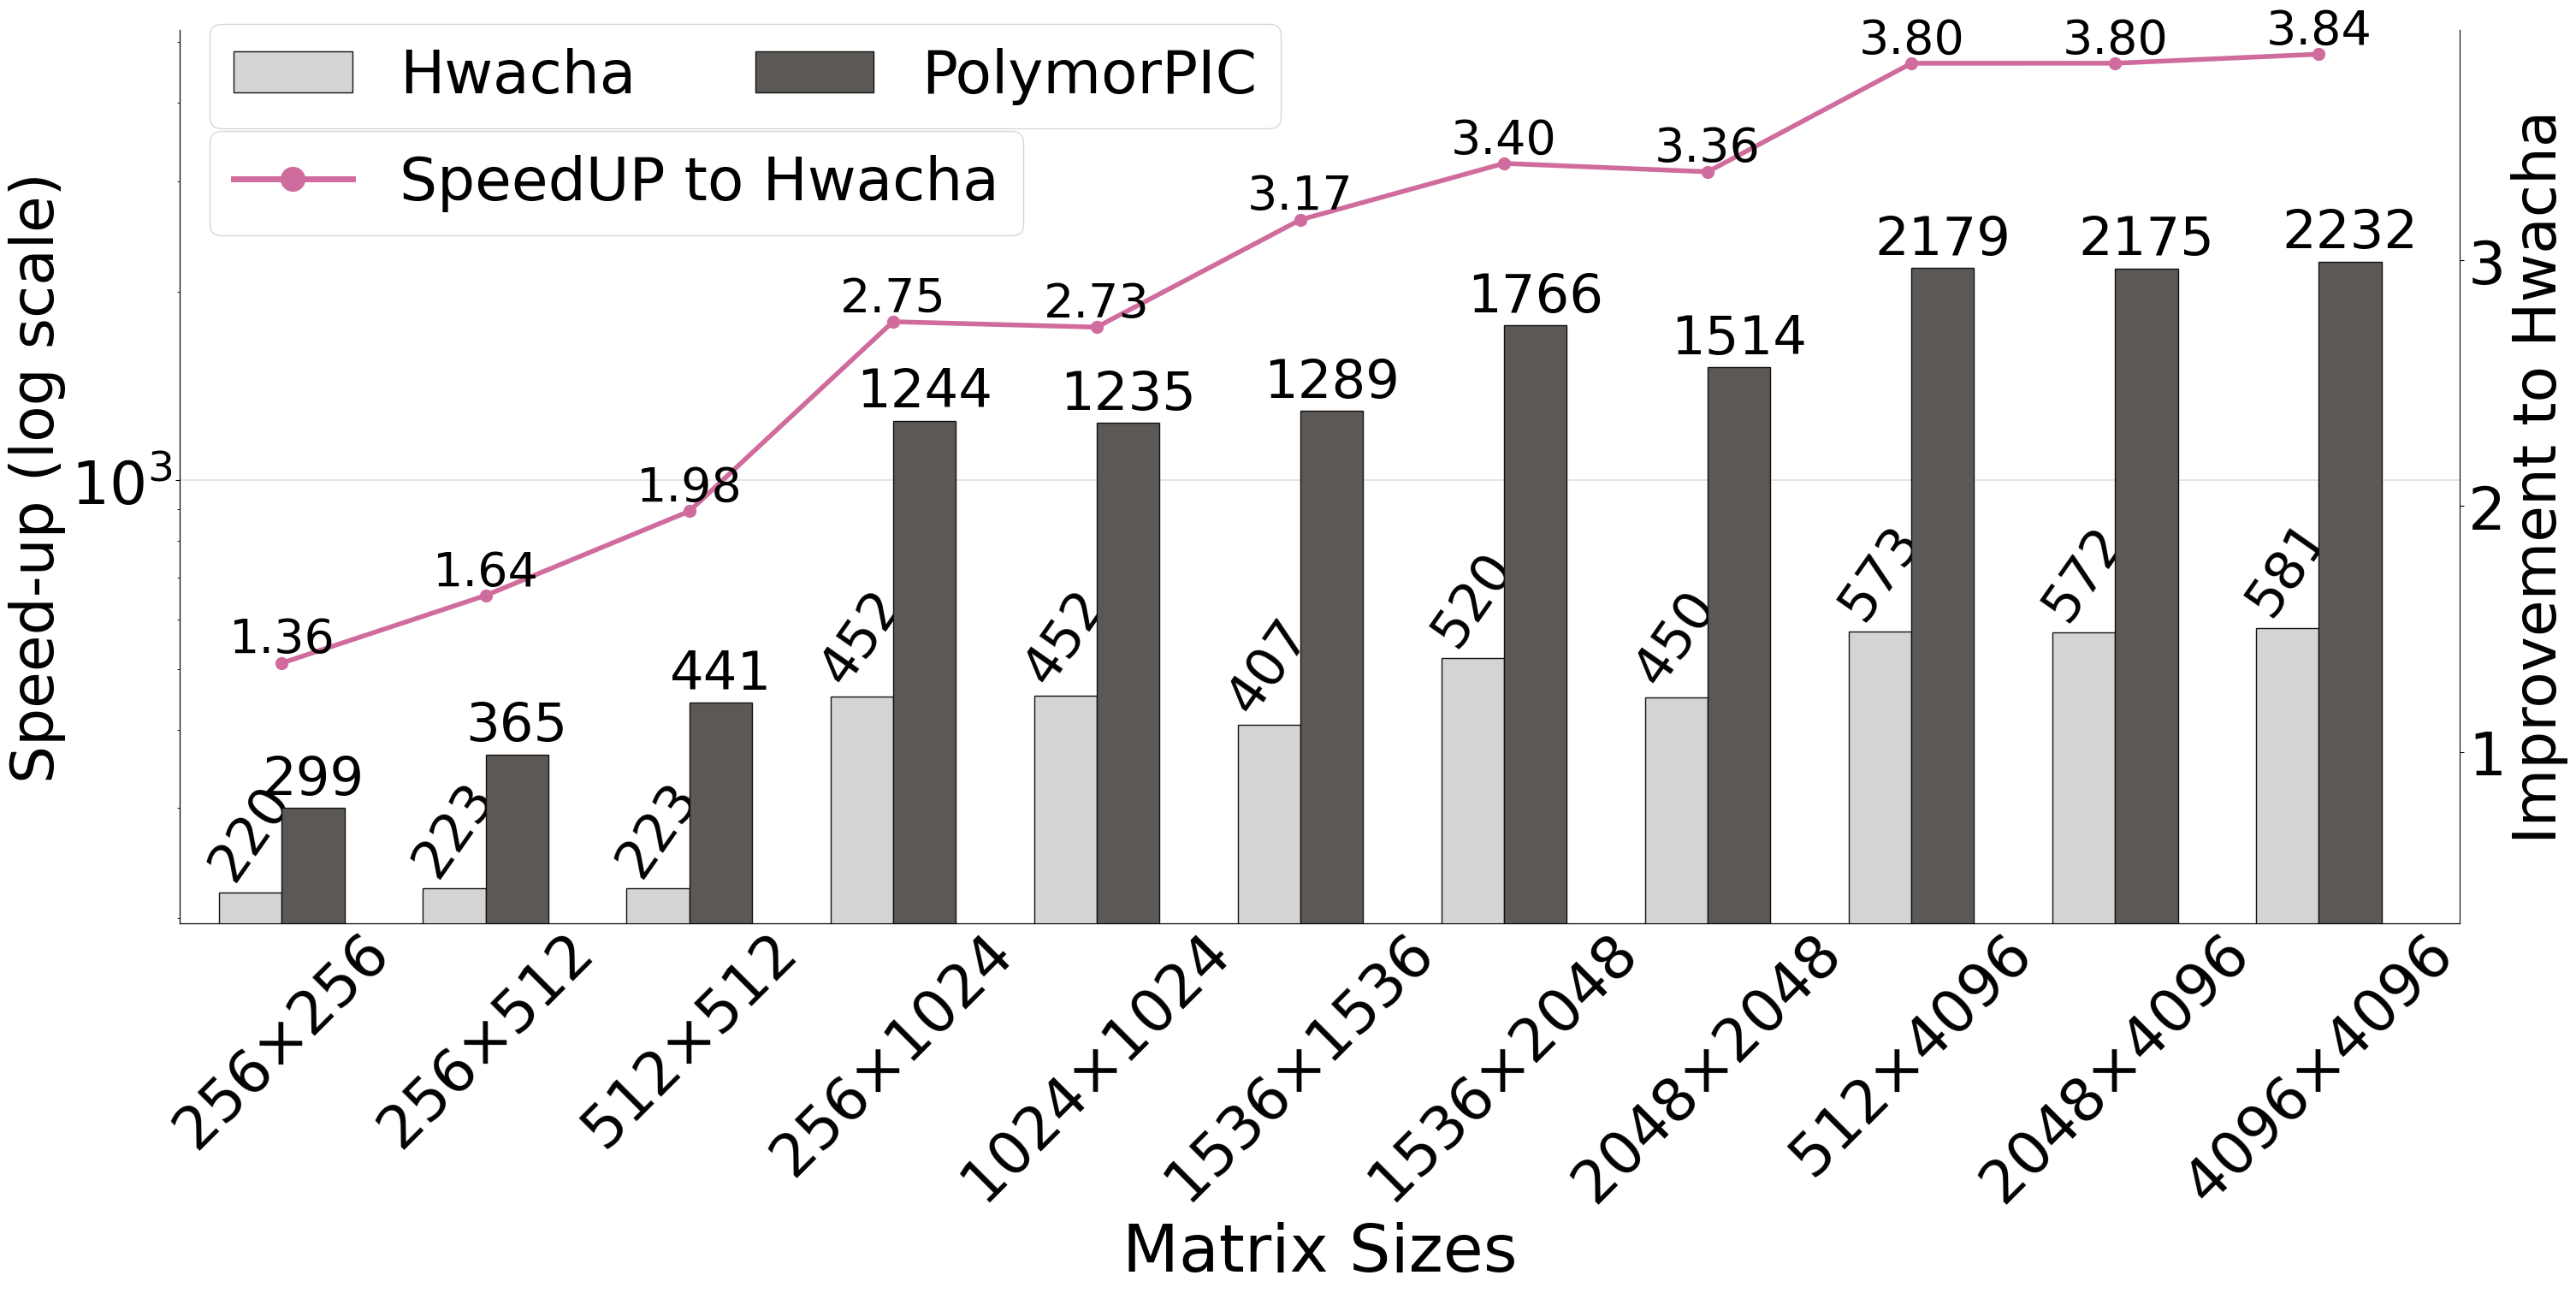

In [52]:
# data from https://allisonhorst.github.io/palmerpenguins/
import matplotlib.pyplot as plt
import numpy as np

# 图表大小
fig_size=(30,15)


####################
# bar图部分
####################
# 每个bar的宽度
bar_width=0.8
# 比较对象的数量
players_num = len(players_list_bar)
map_num = len(maps_list)
print(map_num)
# 每个map的定位，第0个map，第1个map。。用于在x轴上进行放置
map_index=np.arange(map_num)
# 第0个map的初始位置
map_init_pos=0.5
# 每个map的大小（长度，空间）
map_size=2.6
# 根据上面的参数计算每个map的初始位置
each_map_pos=map_index*map_size+map_init_pos
# 计算所有player（每组bar）的中间位置，用于放置map的名字
map_label_pos=each_map_pos+players_num*bar_width/2
map_label_pos

if bar_width*players_num>=map_size:
    message="Warning: one map can't fit so many players! Reduce the width of bars or increase the map size!"
    # ANSI 转义序列设置颜色为红色
    red_start = "\033[91m"
    red_end = "\033[0m"
    print(red_start + message + red_end)
    print(red_start + message + red_end)


# 根据上面参数计算每个map第一个player的位置，即map_pos加上bar宽度的一半
first_player_pos=each_map_pos+bar_width/2

fig, ax_bar = plt.subplots(figsize=fig_size,layout='constrained')
ax_line = ax_bar.twinx()
# 每次画一个player在的每个map的score

# 每次画一个player在map中的bar
for_bar_setting={}
y_max=0
for i in range(len(players_list_bar)):
    player = players_list_bar[i]
    player_scores= players_speed_up_scores_bar[player]
    player_pos=first_player_pos+i*bar_width
    y_max=max(y_max,max(player_scores))
    player_bar = ax_bar.bar(player_pos, player_scores, bar_width, label=player, edgecolor=choosed_edgecolor_dict[player] ,color=choosed_colors_dict[player],zorder=10)
    for_bar_setting[player]=player_bar

# y轴信息
ax_bar.set_ylabel('Speed-up (log scale)',fontsize=50)   # 标签字体
ax_bar.set_yscale('log')                        # 尺度
ax_bar.tick_params(axis='y', labelsize=50)      # tick字体大小
ax_bar.set_ylim([0, y_max+3000])

# x轴信息
ax_bar.set_xticks(map_label_pos)                                    # 标签位置
ax_bar.set_xticklabels(maps_list, rotation=45,fontsize=50)          # 标签的信息，字体大小，内容
# ax_bar.set_xlabel('Matrix Sizes ($M\\times K\\times N$)',fontsize=50)       # label
ax_bar.set_xlabel('Matrix Sizes',fontsize=60)       # label
ax_bar.tick_params(axis='x', length=0)                      # 对应标签上从x轴延伸出的小短线去除
ax_bar.set_xlim([0, max(each_map_pos+players_num*bar_width+1)])                                  # x的范围，从0开始

# 图表边框线设置
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)
ax_line.spines['top'].set_visible(False)

# 网格线
ax_bar.yaxis.grid(True, color='gray', linestyle='-', linewidth=0.3, zorder=0)

# 设置每个bar上的标签
# bar_label_interval=[0.1,1,1]
bar_label_interval= 0.01
# bar_label_interval_dict = {player: interval for player, interval in zip(players_list, bar_label_interval)}
# rotation={"Hwacha":[]}
show_hwacha=[True,True,True,True,True,True,True,True,True,True,True]
show_polymorpic=[True,True,True,True,True,True,True,True,True,True,True]
show={"Hwacha":show_hwacha,"PolymorPIC":show_polymorpic}
rotation_hwacha=[55 for i in range(len(show_hwacha))]
rotation_polymorpic=[0 for i in range(len(show_hwacha))]
choosed_rotation_dict={"Hwacha":rotation_hwacha,"PolymorPIC":rotation_polymorpic}
for player in for_bar_setting:
    player_bars=for_bar_setting[player]
    # 设置每单个bar5
    for bar,i in zip(player_bars,range(len(show[player]))):
        height=bar.get_height()+bar_label_interval*bar.get_height() # 在那个高度防
        if show[player][i]:
            ax_bar.text(bar.get_x() + bar.get_width() / 2, height, 
                    f'{int(bar.get_height())}', ha='center', va='bottom', 
                    fontsize=45, rotation=choosed_rotation_dict[player][i])  # 设置字体大小为10，旋转45度


# ax.set_title('Penguin attributes by species')
# ax.legend(loc='upper left', ncols=3)
ax_bar.legend(loc='upper left',bbox_to_anchor=(0,1.04),fontsize=50,ncol=2)
# ax.set_ylim(0, 250)
# red_patch = mpatches.Patch(color='red', label='The red data')

####################
# 折线图部分
####################
line_color=colors_list[4]
each_map_players_mid_point=[]
for map_begin in each_map_pos:
    each_map_players_mid_point.append(map_begin+(players_num)*bar_width/2)
# ax_line.plot(each_map_players_mid_point, players_scores_line["Hwacha"], 'r-') 
y_data_to_draw=polymorpic_speedup_line
ax_line.plot(each_map_players_mid_point, y_data_to_draw,linewidth=4,color=line_color,marker='o',markersize=10) 
# 设置标签
for i in range(len(each_map_players_mid_point)):
    plt.text(each_map_players_mid_point[i], y_data_to_draw[i], f'{y_data_to_draw[i]:.2f}', ha='center', va='bottom',fontsize=40)
# y轴显示范围
ax_line.set_ylim([0.3, max(y_data_to_draw)+0.1])
ax_line.tick_params(axis='y', labelsize=50) 
# ax_line.legend(loc='lower left',bbox_to_anchor=(0.05,1),fontsize=40)
import matplotlib.lines as mlines
blue_line = mlines.Line2D([], [], color=line_color, marker='.',linewidth=5,
                          markersize=40, label='SpeedUP to Hwacha')
ax_line.legend(handles=[blue_line],loc='upper left',bbox_to_anchor=(0,0.92),fontsize=50)
ax_line.set_ylabel('Improvement to Hwacha',fontsize=50)

plt.savefig("/Users/skytbac/Downloads/5_speedup.pdf")
plt.show()